# Final Project

In [1]:
# Install required packages
%pip install pandas scikit-learn matplotlib seaborn numpy


  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.7.2-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached matplotlib-3.10.7-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numpy-2.3.5-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.0-cp313-cp313-win_amd64.whl.metadata (115 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cach

### Dataset Decription

In [2]:
# Load and explore the dataset
import pandas as pd  
df = pd.read_csv("data/marketing_campaign.csv", sep=';') 
print("Dataset shape:", df.shape)
print("Number of rows:", len(df))
print("\nFirst few rows:")
df.head()

Dataset shape: (2240, 29)
Number of rows: 2240

First few rows:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


- Number of samples: 2,240 customers

- Number of features: 24 input features after encoding (skip DTcustomer, Complain, Z_CostContact, Z_Revenue)

- Target variable: Response — 1 if the customer accepted the most recent campaign, 0 otherwise

### Data Preprocessing

In [3]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# 1. Load Dataset
df = pd.read_csv("data/marketing_campaign.csv", sep=';')
df.columns = df.columns.str.strip()  # Remove extra spaces
print(df.columns.tolist())  # Optional: check column names


# 2. Cleaning / Handling Missing Values
numeric_cols = ['Kidhome', 'Teenhome', 'Income', 
                'MntFishProducts','MntMeatProducts','MntFruits',
                'MntSweetProducts','MntWines','MntGoldProds',
                'NumDealsPurchases','NumCatalogPurchases','NumStorePurchases',
                'NumWebPurchases','NumWebVisitsMonth','Recency']

# Keep only existing numeric columns
numeric_cols = [col for col in numeric_cols if col in df.columns]
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

categorical_cols = ['Education','Marital_Status']
categorical_cols = [col for col in categorical_cols if col in df.columns]
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


# 3. Define Features and Target

target = 'Response'
# Drop target and irrelevant columns
X = df.drop(columns=[target, 'Dt_Customer','ID','Z_CostContact','Z_Revenue'])
y = df[target]


# 4. Preprocessing: Encoding & Scaling

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = ['Education','Marital_Status']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])


# 5. Train / Validation / Test Split

# First, split off the test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Then, split the remaining into training (80% of temp) and validation (20% of temp)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.2, random_state=42, stratify=y_temp
)


# 6. Fit Preprocessor and Transform

X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)


# 7. Output shapes

print("Training features shape:", X_train_processed.shape)
print("Validation features shape:", X_val_processed.shape)
print("Testing features shape:", X_test_processed.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Testing labels shape:", y_test.shape)

['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Training features shape: (1433, 33)
Validation features shape: (359, 33)
Testing features shape: (448, 33)
Training labels shape: (1433,)
Validation labels shape: (359,)
Testing labels shape: (448,)


### Comprehensive MLP Hyperparameter Search

Starting comprehensive MLP hyperparameter search...
Testing 6 architectures × 5 alphas × 2 learning rates × 2 activations
Total: 120 combinations

TOP 5 MODEL CONFIGURATIONS

1. Architecture: (128, 64, 32)
   Alpha: 0.001, LR: constant, Activation: relu
   Val AUC: 0.8843, Val Accuracy: 0.8802
   Iterations: 39

2. Architecture: (128, 64, 32)
   Alpha: 0.001, LR: adaptive, Activation: relu
   Val AUC: 0.8843, Val Accuracy: 0.8802
   Iterations: 39

3. Architecture: (128, 64, 32)
   Alpha: 0.01, LR: constant, Activation: relu
   Val AUC: 0.8840, Val Accuracy: 0.8747
   Iterations: 37

4. Architecture: (128, 64, 32)
   Alpha: 0.01, LR: adaptive, Activation: relu
   Val AUC: 0.8840, Val Accuracy: 0.8747
   Iterations: 37

5. Architecture: (128, 64, 32)
   Alpha: 0.0001, LR: constant, Activation: relu
   Val AUC: 0.8839, Val Accuracy: 0.8802
   Iterations: 39

BEST MODEL
Architecture: (128, 64, 32)
Alpha: 0.001
Learning Rate: constant
Activation: relu
Validation AUC: 0.8843
Validation Accu

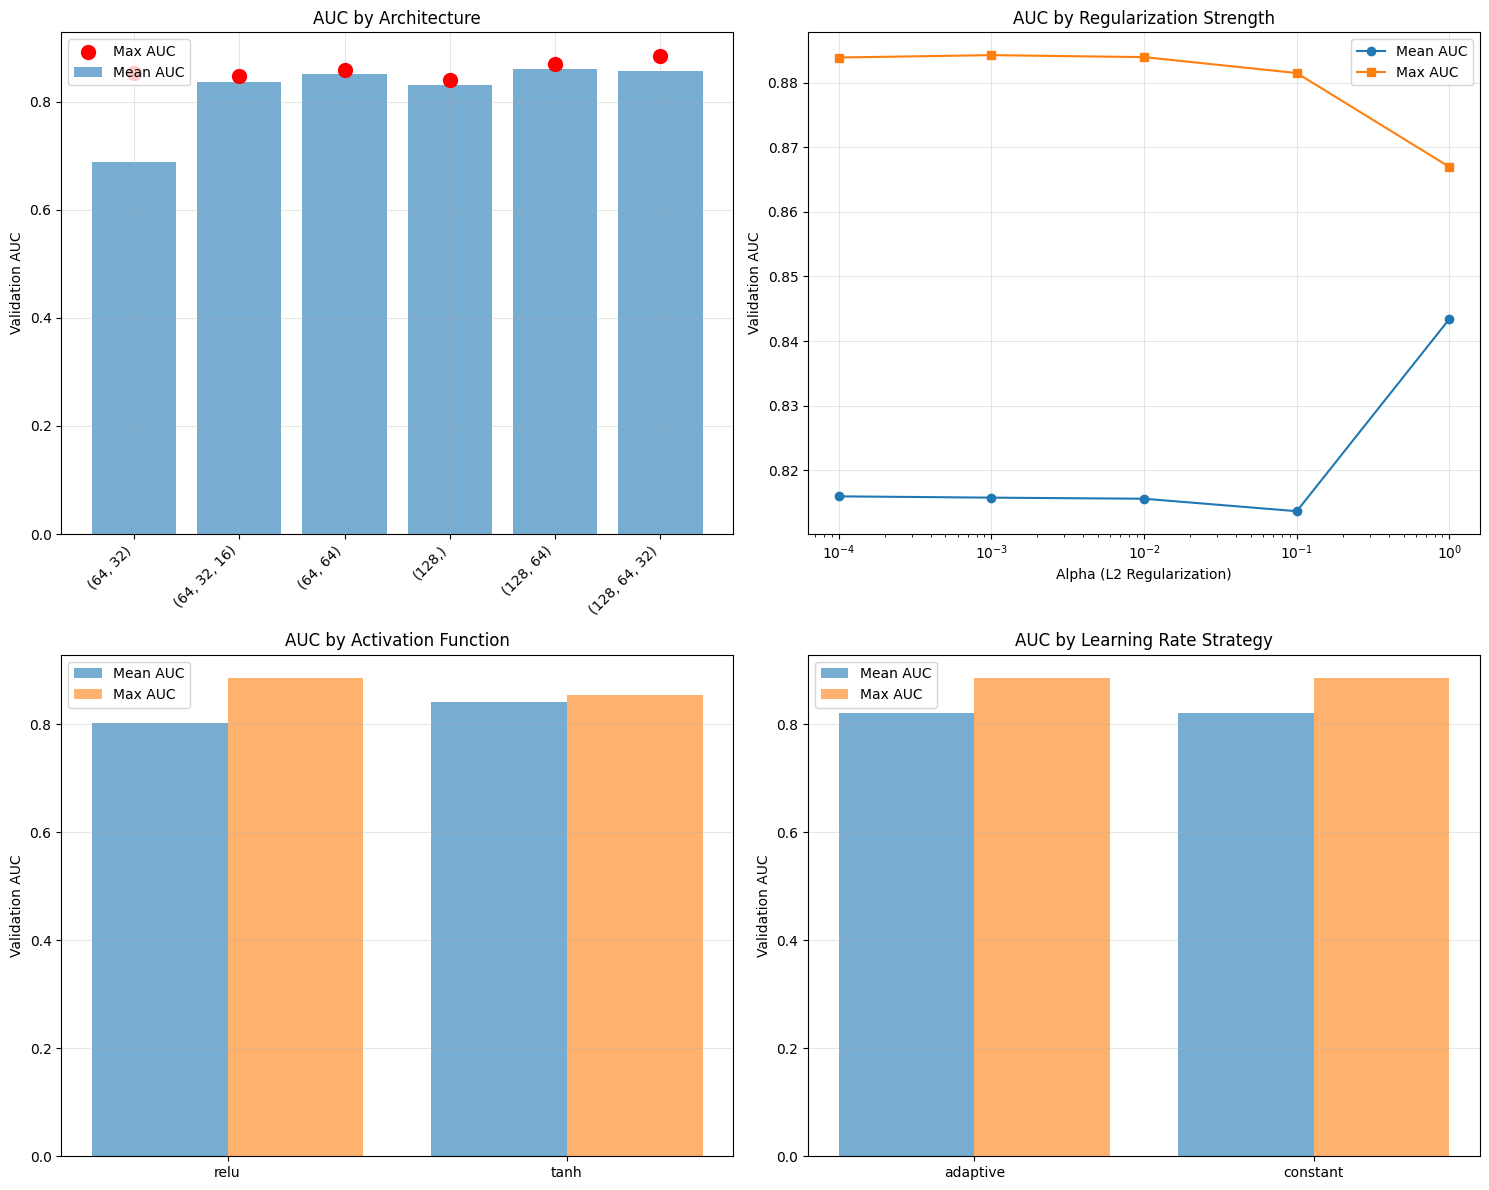

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from itertools import product

# 1. Define comprehensive hyperparameter grid
architectures = [
    (128,),           # Single layer, wider
    (64, 32),         # Two layers, decreasing
    (128, 64),        # Two layers, wider  
    (64, 64),         # Two layers, equal
    (128, 64, 32),    # Three layers, decreasing
    (64, 32, 16),     # Three layers, smaller
]

alpha_values = [0.0001, 0.001, 0.01, 0.1, 1.0]  # L2 regularization
learning_rates = ['constant', 'adaptive']
activations = ['relu', 'tanh']

# Store results
results = []

print("Starting comprehensive MLP hyperparameter search...")
print(f"Testing {len(architectures)} architectures × {len(alpha_values)} alphas × {len(learning_rates)} learning rates × {len(activations)} activations")
print(f"Total: {len(architectures) * len(alpha_values) * len(learning_rates) * len(activations)} combinations\n")

# 2. Grid search over all combinations
for arch, alpha, lr, activation in product(architectures, alpha_values, learning_rates, activations):
    model = MLPClassifier(
        hidden_layer_sizes=arch,
        alpha=alpha,
        learning_rate=lr,
        activation=activation,
        max_iter=2000,  # Increased for better convergence
        solver='adam',
        random_state=42,
        early_stopping=True,  # Stop early if validation doesn't improve
        validation_fraction=0.1,
        n_iter_no_change=10
    )
    
    try:
        model.fit(X_train_processed, y_train)
        
        # Predict on validation set
        y_val_pred = model.predict(X_val_processed)
        y_val_proba = model.predict_proba(X_val_processed)[:, 1]
        
        # Evaluate
        acc = accuracy_score(y_val, y_val_pred)
        auc = roc_auc_score(y_val, y_val_proba)
        
        results.append({
            'architecture': arch,
            'alpha': alpha,
            'learning_rate': lr,
            'activation': activation,
            'val_accuracy': acc,
            'val_auc': auc,
            'n_iter': model.n_iter_
        })
    except Exception as e:
        print(f"Failed for {arch}, alpha={alpha}, lr={lr}, activation={activation}: {e}")

# 3. Find best model
results_sorted = sorted(results, key=lambda x: x['val_auc'], reverse=True)
best_model = results_sorted[0]

print("=" * 70)
print("TOP 5 MODEL CONFIGURATIONS")
print("=" * 70)
for i, result in enumerate(results_sorted[:5], 1):
    print(f"\n{i}. Architecture: {result['architecture']}")
    print(f"   Alpha: {result['alpha']}, LR: {result['learning_rate']}, Activation: {result['activation']}")
    print(f"   Val AUC: {result['val_auc']:.4f}, Val Accuracy: {result['val_accuracy']:.4f}")
    print(f"   Iterations: {result['n_iter']}")

print("\n" + "=" * 70)
print("BEST MODEL")
print("=" * 70)
print(f"Architecture: {best_model['architecture']}")
print(f"Alpha: {best_model['alpha']}")
print(f"Learning Rate: {best_model['learning_rate']}")
print(f"Activation: {best_model['activation']}")
print(f"Validation AUC: {best_model['val_auc']:.4f}")
print(f"Validation Accuracy: {best_model['val_accuracy']:.4f}")

# 4. Visualize results by architecture
import pandas as pd

df_results = pd.DataFrame(results)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: AUC by architecture
arch_auc = df_results.groupby('architecture')['val_auc'].agg(['mean', 'max'])
arch_labels = [str(arch) for arch in arch_auc.index]
axes[0, 0].bar(range(len(arch_labels)), arch_auc['mean'], alpha=0.6, label='Mean AUC')
axes[0, 0].scatter(range(len(arch_labels)), arch_auc['max'], color='red', s=100, label='Max AUC', zorder=5)
axes[0, 0].set_xticks(range(len(arch_labels)))
axes[0, 0].set_xticklabels(arch_labels, rotation=45, ha='right')
axes[0, 0].set_ylabel('Validation AUC')
axes[0, 0].set_title('AUC by Architecture')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: AUC by alpha
alpha_auc = df_results.groupby('alpha')['val_auc'].agg(['mean', 'max'])
axes[0, 1].semilogx(alpha_auc.index, alpha_auc['mean'], marker='o', label='Mean AUC')
axes[0, 1].semilogx(alpha_auc.index, alpha_auc['max'], marker='s', label='Max AUC')
axes[0, 1].set_xlabel('Alpha (L2 Regularization)')
axes[0, 1].set_ylabel('Validation AUC')
axes[0, 1].set_title('AUC by Regularization Strength')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: AUC by activation function
activation_auc = df_results.groupby('activation')['val_auc'].agg(['mean', 'max'])
x_pos = range(len(activation_auc))
axes[1, 0].bar([i-0.2 for i in x_pos], activation_auc['mean'], width=0.4, alpha=0.6, label='Mean AUC')
axes[1, 0].bar([i+0.2 for i in x_pos], activation_auc['max'], width=0.4, alpha=0.6, label='Max AUC')
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(activation_auc.index)
axes[1, 0].set_ylabel('Validation AUC')
axes[1, 0].set_title('AUC by Activation Function')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: AUC by learning rate
lr_auc = df_results.groupby('learning_rate')['val_auc'].agg(['mean', 'max'])
x_pos = range(len(lr_auc))
axes[1, 1].bar([i-0.2 for i in x_pos], lr_auc['mean'], width=0.4, alpha=0.6, label='Mean AUC')
axes[1, 1].bar([i+0.2 for i in x_pos], lr_auc['max'], width=0.4, alpha=0.6, label='Max AUC')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(lr_auc.index)
axes[1, 1].set_ylabel('Validation AUC')
axes[1, 1].set_title('AUC by Learning Rate Strategy')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### Train Final MLP Model with Best Hyperparameters

In [5]:
# Combine training + validation for final model
X_final = np.vstack([X_train_processed, X_val_processed])
y_final = np.concatenate([y_train, y_val])

# Train final model with best hyperparameters
final_model = MLPClassifier(
    hidden_layer_sizes=best_model['architecture'],
    alpha=best_model['alpha'],
    learning_rate=best_model['learning_rate'],
    activation=best_model['activation'],
    max_iter=2000,
    solver='adam',
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=10
)

# Train on full training + validation sets
final_model.fit(X_final, y_final)

# Evaluate on the test set
y_test_pred = final_model.predict(X_test_processed)
y_test_proba = final_model.predict_proba(X_test_processed)[:, 1]

test_acc = accuracy_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print("=" * 60)
print("FINAL MLP MODEL - TEST SET PERFORMANCE")
print("=" * 60)
print(f"Architecture: {best_model['architecture']}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print(f"Training iterations: {final_model.n_iter_}")

FINAL MLP MODEL - TEST SET PERFORMANCE
Architecture: (128, 64, 32)
Test Accuracy: 0.8750
Test AUC: 0.8899
Training iterations: 29


### Evaluation Metrics

MLP Classification Report:
              precision    recall  f1-score   support

           0     0.8973    0.9633    0.9291       381
           1     0.6410    0.3731    0.4717        67

    accuracy                         0.8750       448
   macro avg     0.7692    0.6682    0.7004       448
weighted avg     0.8590    0.8750    0.8607       448



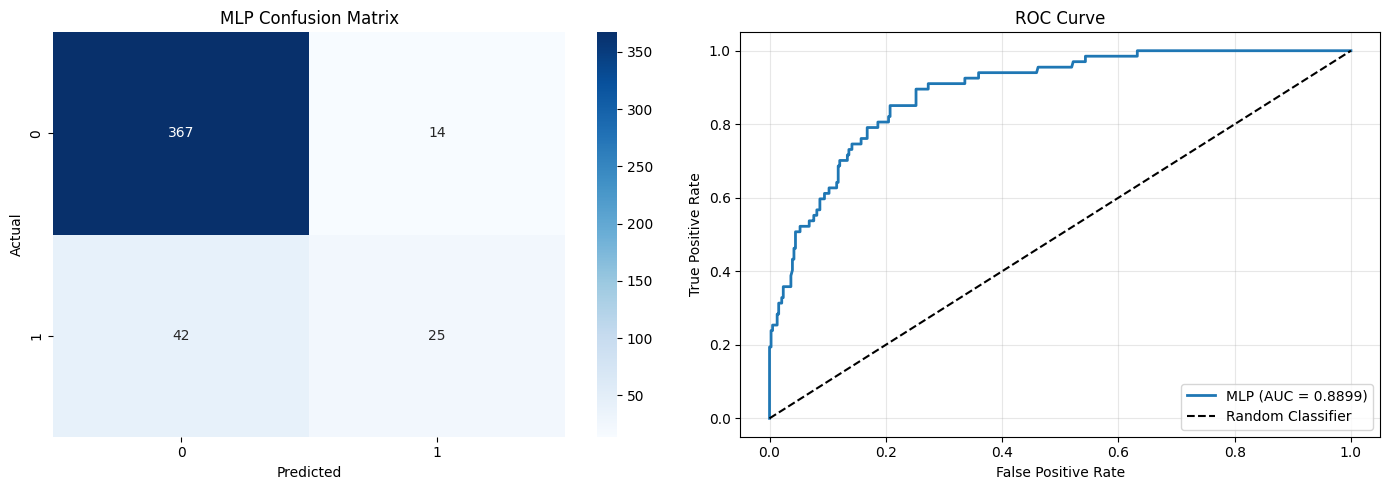

In [6]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Classification Report
print("MLP Classification Report:")
print(classification_report(y_test, y_test_pred, digits=4))

# Confusion Matrix and ROC Curve side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_title("MLP Confusion Matrix")

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
axes[1].plot(fpr, tpr, label=f'MLP (AUC = {test_auc:.4f})', linewidth=2)
axes[1].plot([0,1],[0,1],'k--', label='Random Classifier')
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve")
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

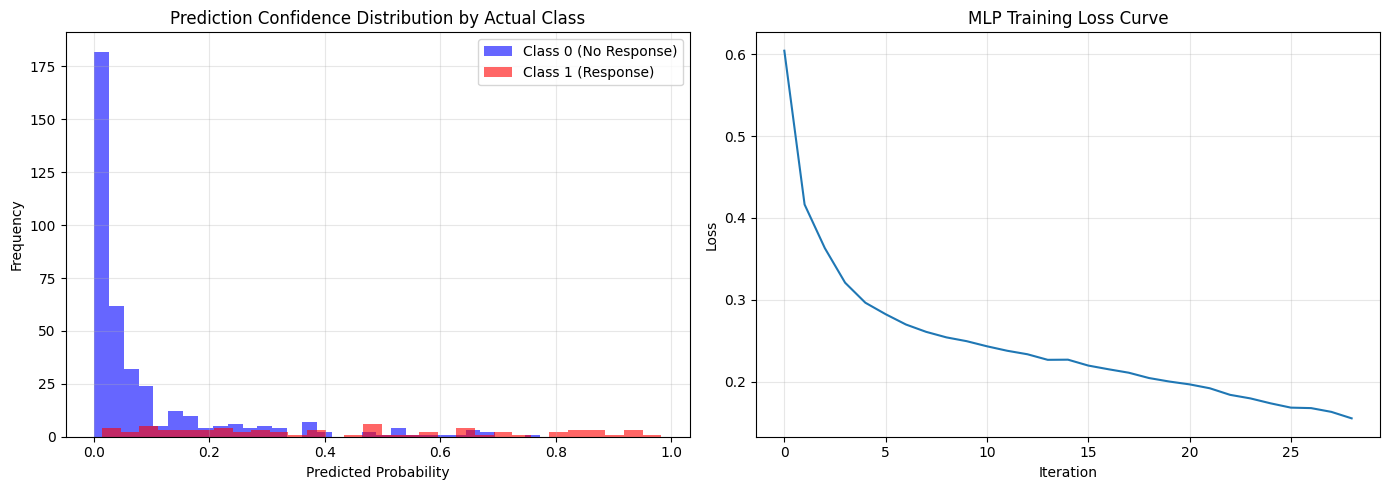

In [7]:
# Analyze prediction confidence distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Probability distribution by actual class
axes[0].hist(y_test_proba[y_test == 0], bins=30, alpha=0.6, label='Class 0 (No Response)', color='blue')
axes[0].hist(y_test_proba[y_test == 1], bins=30, alpha=0.6, label='Class 1 (Response)', color='red')
axes[0].set_xlabel('Predicted Probability')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Prediction Confidence Distribution by Actual Class')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Learning curve (loss over iterations)
axes[1].plot(final_model.loss_curve_)
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Loss')
axes[1].set_title('MLP Training Loss Curve')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Interpret the coefficients to see which features make a customer more or less likely to respond

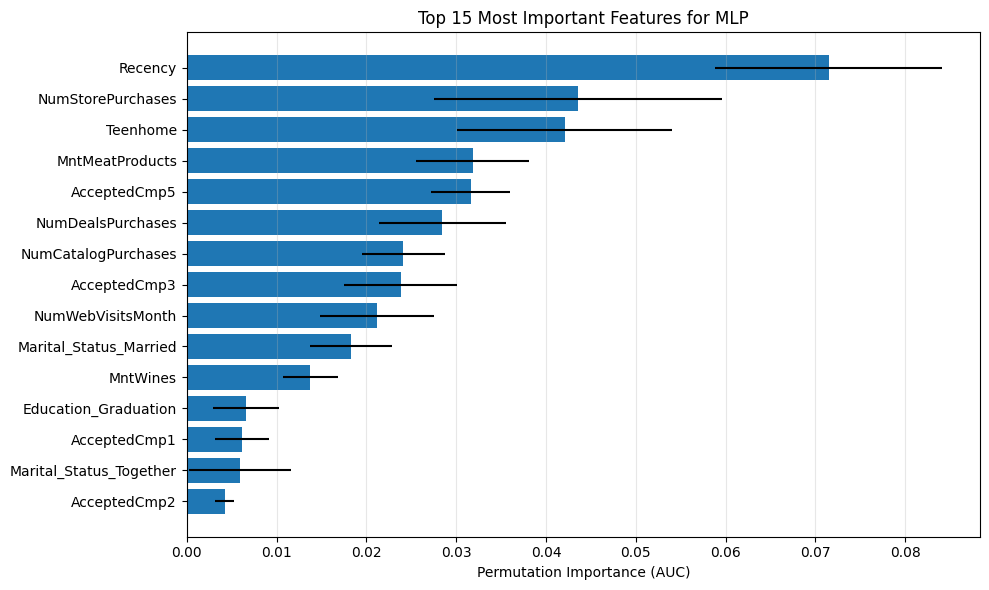


Top 10 Most Important Features:
               feature  importance
               Recency    0.071469
     NumStorePurchases    0.043556
              Teenhome    0.042099
       MntMeatProducts    0.031837
          AcceptedCmp5    0.031594
     NumDealsPurchases    0.028476
   NumCatalogPurchases    0.024123
          AcceptedCmp3    0.023806
     NumWebVisitsMonth    0.021183
Marital_Status_Married    0.018294


In [8]:
# Analyze feature importance using permutation importance
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(
    final_model, X_test_processed, y_test, 
    n_repeats=10, random_state=42, scoring='roc_auc'
)

# Get feature names after preprocessing
feature_names = numeric_features + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))

# Create dataframe for visualization
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': perm_importance.importances_mean,
    'std': perm_importance.importances_std
})
importance_df = importance_df.sort_values('importance', ascending=False).head(15)

# Plot top features
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance_df)), importance_df['importance'], xerr=importance_df['std'])
plt.yticks(range(len(importance_df)), importance_df['feature'])
plt.xlabel('Permutation Importance (AUC)')
plt.title('Top 15 Most Important Features for MLP')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Show top features
print("\nTop 10 Most Important Features:")
print(importance_df.head(10)[['feature', 'importance']].to_string(index=False))

### Logistic Regression Model for Comparison


Best C for Logistic Regression: 0.0095
Validation AUC: 0.8446
Validation Accuracy: 0.8691


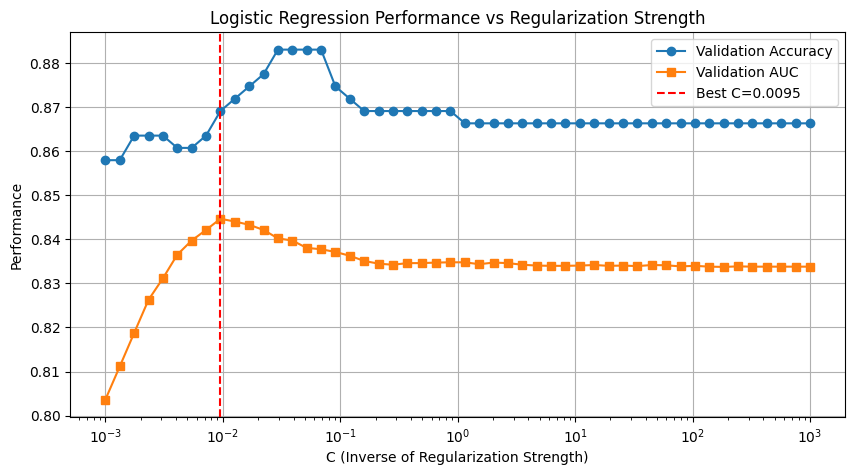

In [9]:
from sklearn.linear_model import LogisticRegression

# Define hyperparameter range for Logistic Regression
C_values_lr = np.logspace(-3, 3, 50)

val_accuracy_lr = []
val_auc_lr = []

# Train Logistic Regression for each C value
for C in C_values_lr:
    model_lr = LogisticRegression(
        C=C,
        max_iter=1000,
        random_state=42,
        solver='lbfgs'
    )
    
    model_lr.fit(X_train_processed, y_train)
    
    # Predict on validation set
    y_val_pred_lr = model_lr.predict(X_val_processed)
    y_val_proba_lr = model_lr.predict_proba(X_val_processed)[:, 1]
    
    # Evaluate
    acc = accuracy_score(y_val, y_val_pred_lr)
    auc = roc_auc_score(y_val, y_val_proba_lr)
    
    val_accuracy_lr.append(acc)
    val_auc_lr.append(auc)

# Find best parameter
best_idx_lr = np.argmax(val_auc_lr)
best_C_lr = C_values_lr[best_idx_lr]

print(f"Best C for Logistic Regression: {best_C_lr:.4f}")
print(f"Validation AUC: {val_auc_lr[best_idx_lr]:.4f}")
print(f"Validation Accuracy: {val_accuracy_lr[best_idx_lr]:.4f}")

# Plot performance
plt.figure(figsize=(10,5))
plt.semilogx(C_values_lr, val_accuracy_lr, marker='o', label='Validation Accuracy')
plt.semilogx(C_values_lr, val_auc_lr, marker='s', label='Validation AUC')
plt.axvline(best_C_lr, color='r', linestyle='--', label=f'Best C={best_C_lr:.4f}')
plt.xlabel("C (Inverse of Regularization Strength)")
plt.ylabel("Performance")
plt.title("Logistic Regression Performance vs Regularization Strength")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Train final Logistic Regression model
final_model_lr = LogisticRegression(
    C=best_C_lr,
    max_iter=1000,
    random_state=42,
    solver='lbfgs'
)

final_model_lr.fit(X_final, y_final)

# Evaluate on test set
y_test_pred_lr = final_model_lr.predict(X_test_processed)
y_test_proba_lr = final_model_lr.predict_proba(X_test_processed)[:, 1]

test_acc_lr = accuracy_score(y_test, y_test_pred_lr)
test_auc_lr = roc_auc_score(y_test, y_test_proba_lr)

print("=" * 60)
print("LOGISTIC REGRESSION - TEST SET PERFORMANCE")
print("=" * 60)
print(f"Test Accuracy: {test_acc_lr:.4f}")
print(f"Test AUC: {test_auc_lr:.4f}")


LOGISTIC REGRESSION - TEST SET PERFORMANCE
Test Accuracy: 0.8728
Test AUC: 0.8846


In [11]:
# Final comprehensive comparison
print("=" * 70)
print("FINAL MODEL COMPARISON: MLP vs LOGISTIC REGRESSION")
print("=" * 70)

# Create comparison dataframe
comparison_data = {
    'Metric': ['Test Accuracy', 'Test AUC', 'Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)'],
    'MLP': [
        test_acc,
        test_auc,
        classification_report(y_test, y_test_pred, output_dict=True)['1']['precision'],
        classification_report(y_test, y_test_pred, output_dict=True)['1']['recall'],
        classification_report(y_test, y_test_pred, output_dict=True)['1']['f1-score']
    ],
    'Logistic Regression': [
        test_acc_lr,
        test_auc_lr,
        classification_report(y_test, y_test_pred_lr, output_dict=True)['1']['precision'],
        classification_report(y_test, y_test_pred_lr, output_dict=True)['1']['recall'],
        classification_report(y_test, y_test_pred_lr, output_dict=True)['1']['f1-score']
    ]
}

comparison_df = pd.DataFrame(comparison_data)
comparison_df['Difference (MLP - LR)'] = comparison_df['MLP'] - comparison_df['Logistic Regression']
comparison_df['MLP'] = comparison_df['MLP'].round(4)
comparison_df['Logistic Regression'] = comparison_df['Logistic Regression'].round(4)
comparison_df['Difference (MLP - LR)'] = comparison_df['Difference (MLP - LR)'].round(4)

print("\n", comparison_df.to_string(index=False))

print("\n--- Classification Report: MLP ---")
print(classification_report(y_test, y_test_pred, digits=4))

print("\n--- Classification Report: Logistic Regression ---")
print(classification_report(y_test, y_test_pred_lr, digits=4))

print("\n" + "=" * 70)
print(f"CONCLUSION: MLP outperforms Logistic Regression by {(test_auc - test_auc_lr)*100:.2f}% in AUC")
print("=" * 70)


FINAL MODEL COMPARISON: MLP vs LOGISTIC REGRESSION

              Metric    MLP  Logistic Regression  Difference (MLP - LR)
      Test Accuracy 0.8750               0.8728                 0.0022
           Test AUC 0.8899               0.8846                 0.0052
Precision (Class 1) 0.6410               0.7778                -0.1368
   Recall (Class 1) 0.3731               0.2090                 0.1642
 F1-Score (Class 1) 0.4717               0.3294                 0.1423

--- Classification Report: MLP ---
              precision    recall  f1-score   support

           0     0.8973    0.9633    0.9291       381
           1     0.6410    0.3731    0.4717        67

    accuracy                         0.8750       448
   macro avg     0.7692    0.6682    0.7004       448
weighted avg     0.8590    0.8750    0.8607       448


--- Classification Report: Logistic Regression ---
              precision    recall  f1-score   support

           0     0.8767    0.9895    0.9297       3

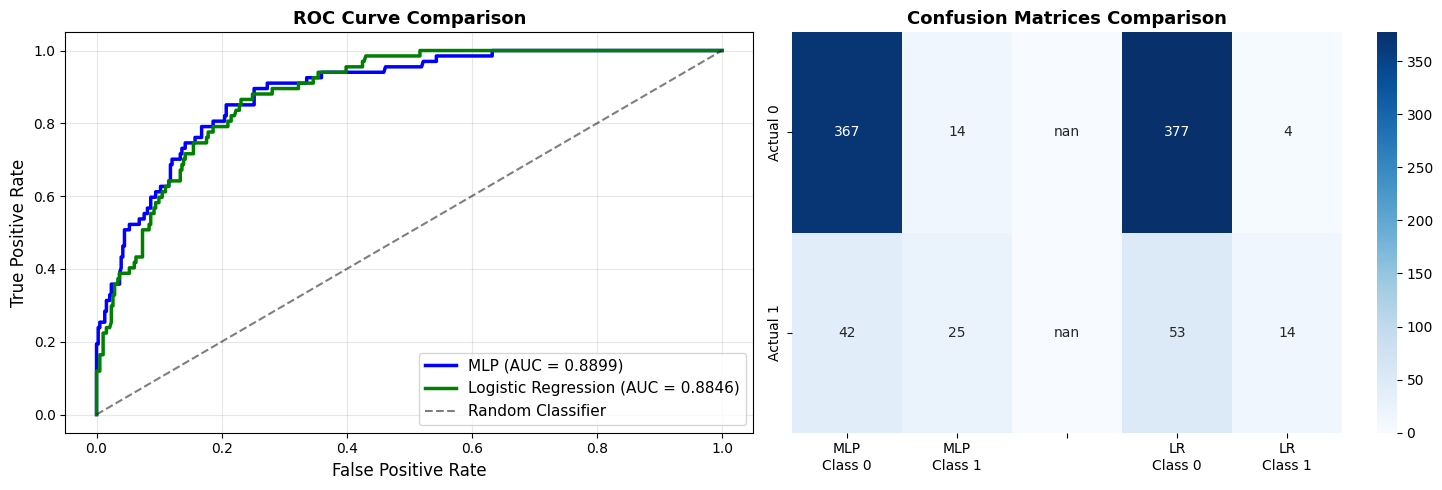

In [12]:
# Visual Comparison: MLP vs Logistic Regression
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. ROC Curve Comparison
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_test_proba)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_test_proba_lr)

axes[0].plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {test_auc:.4f})', linewidth=2.5, color='blue')
axes[0].plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {test_auc_lr:.4f})', linewidth=2.5, color='green')
axes[0].plot([0,1],[0,1],'k--', label='Random Classifier', alpha=0.5)
axes[0].set_xlabel("False Positive Rate", fontsize=12)
axes[0].set_ylabel("True Positive Rate", fontsize=12)
axes[0].set_title("ROC Curve Comparison", fontsize=13, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3)

# 2. Confusion Matrices
cm_mlp = confusion_matrix(y_test, y_test_pred)
cm_lr = confusion_matrix(y_test, y_test_pred_lr)

# Create side-by-side confusion matrices
cm_combined = np.hstack([cm_mlp, np.zeros((2, 1)), cm_lr])
labels_combined = ['MLP\nClass 0', 'MLP\nClass 1', '', 'LR\nClass 0', 'LR\nClass 1']

sns.heatmap(cm_combined, annot=np.array([[cm_mlp[0,0], cm_mlp[0,1], np.nan, cm_lr[0,0], cm_lr[0,1]],
                                          [cm_mlp[1,0], cm_mlp[1,1], np.nan, cm_lr[1,0], cm_lr[1,1]]]),
            fmt='g', cmap='Blues', ax=axes[1], cbar=True, 
            xticklabels=labels_combined, yticklabels=['Actual 0', 'Actual 1'])
axes[1].set_title("Confusion Matrices Comparison", fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()


### Data Visualization with MLP Classifier


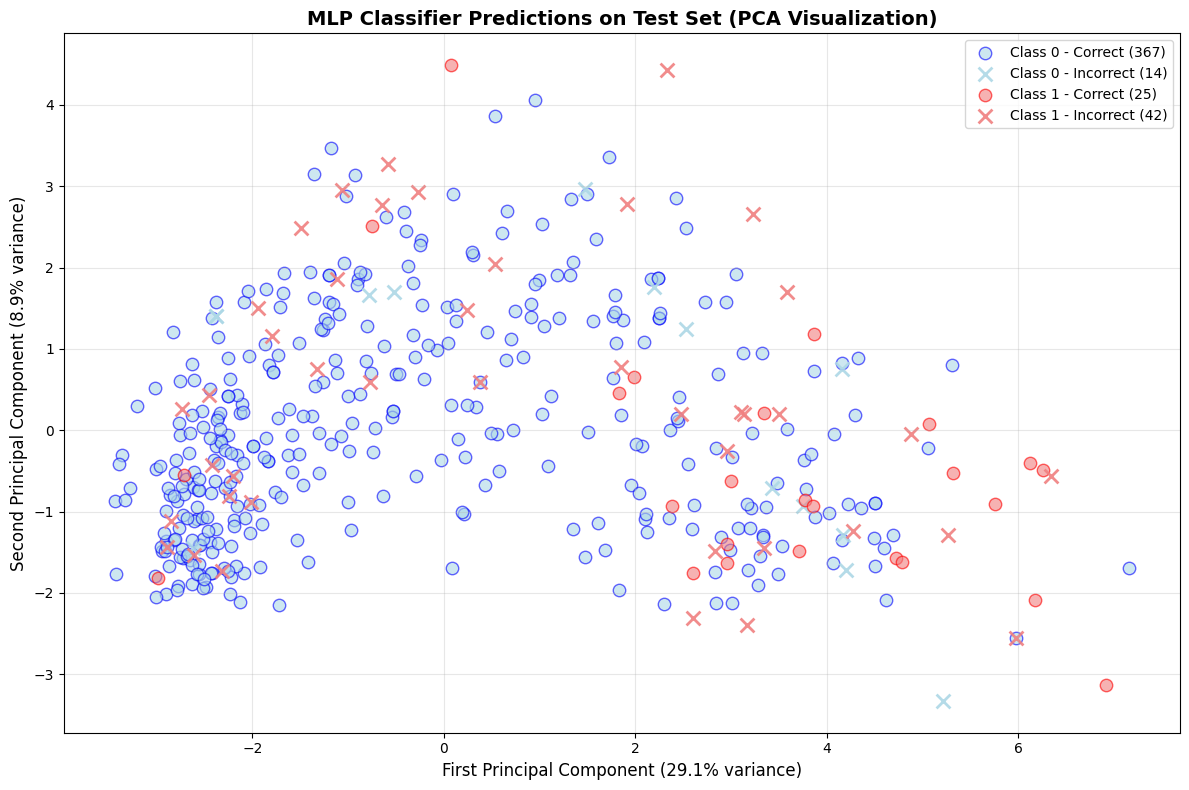


PCA explains 38.0% of total variance
Using 2 components to visualize 33 original features


In [16]:
# Visualize the data and MLP classifier predictions using PCA
from sklearn.decomposition import PCA

# Reduce data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_processed)

# Create the visualization
fig, ax = plt.subplots(figsize=(12, 8))

# Plot correct predictions
correct_mask = (y_test_pred == y_test)
incorrect_mask = ~correct_mask

# Class 0 (No Response)
class_0_correct = (y_test == 0) & correct_mask
class_0_incorrect = (y_test == 0) & incorrect_mask

# Class 1 (Response)
class_1_correct = (y_test == 1) & correct_mask
class_1_incorrect = (y_test == 1) & incorrect_mask

# Plot with different markers for correct/incorrect predictions
ax.scatter(X_test_pca[class_0_correct, 0], X_test_pca[class_0_correct, 1], 
           c='lightblue', marker='o', s=80, alpha=0.6, edgecolors='blue', linewidth=1,
           label=f'Class 0 - Correct ({np.sum(class_0_correct)})')

ax.scatter(X_test_pca[class_0_incorrect, 0], X_test_pca[class_0_incorrect, 1], 
           c='lightblue', marker='x', s=100, alpha=0.9, linewidth=2,
           label=f'Class 0 - Incorrect ({np.sum(class_0_incorrect)})')

ax.scatter(X_test_pca[class_1_correct, 0], X_test_pca[class_1_correct, 1], 
           c='lightcoral', marker='o', s=80, alpha=0.6, edgecolors='red', linewidth=1,
           label=f'Class 1 - Correct ({np.sum(class_1_correct)})')

ax.scatter(X_test_pca[class_1_incorrect, 0], X_test_pca[class_1_incorrect, 1], 
           c='lightcoral', marker='x', s=100, alpha=0.9, linewidth=2,
           label=f'Class 1 - Incorrect ({np.sum(class_1_incorrect)})')

# Add title and labels
ax.set_xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.1%} variance)', fontsize=12)
ax.set_ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.1%} variance)', fontsize=12)
ax.set_title('MLP Classifier Predictions on Test Set (PCA Visualization)', fontsize=14, fontweight='bold')
ax.legend(fontsize=10, loc='best')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nPCA explains {pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]:.1%} of total variance")
print(f"Using 2 components to visualize {X_test_processed.shape[1]} original features")
